In [2]:
import os
import torch
import random
import argparse
from EncDec import *
from EncDec._2020211A3 import *
from torch.utils.data import DataLoader

/mnt/disk1/sumdev/CourseWork/a3_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
x = torch.randn(64, 1, 28, 28)
y = x*2
structure_similarity_index(x, y)

65.65153705522559

In [10]:
x = torch.randn(64, 3, 28, 28)
y = torch.randn(64, 3, 28, 28)
peak_signal_to_noise_ratio(x, y)

45.12687280704511

In [28]:
import torch
from torchvision import transforms

x = torch.randn(1, 3, 224, 224)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
])
x = transform(x)
x.shape

torch.Size([1, 1, 224, 224])

In [2]:
Data = DataLoader(dataset=AlteredMNIST(),
                      batch_size=BATCH_SIZE,
                      shuffle=True,
                      num_workers=2,
                      drop_last=True,
                      pin_memory=True)
E = Encoder()
D = Decoder()
L = [AELossFn()]
O = torch.optim.Adam(ParameterSelector(E, D), lr=LEARNING_RATE)
print("Training Encoder: {}, Decoder: {} on Modified MNIST dataset in AE training paradigm".format(
        E.__class__.__name__,
        D.__class__.__name__,
    ))

Training Encoder: Encoder, Decoder: Decoder on Modified MNIST dataset in AE training paradigm


In [3]:
AETrainer(Data, E, D, L[0], O, 'cuda')

>>>>> Epoch:1, Minibatch:1, Loss:0.9000949263572693, Similarity:0.11545565724372864
>>>>> Epoch:1, Minibatch:11, Loss:0.3975071310997009, Similarity:0.06135617196559906
>>>>> Epoch:1, Minibatch:21, Loss:0.277363121509552, Similarity:0.05403149127960205
>>>>> Epoch:1, Minibatch:31, Loss:0.21797794103622437, Similarity:0.0510815866291523
>>>>> Epoch:1, Minibatch:41, Loss:0.1494753062725067, Similarity:0.0680917501449585
>>>>> Epoch:1, Minibatch:51, Loss:0.10370076447725296, Similarity:0.04143580049276352
>>>>> Epoch:1, Minibatch:61, Loss:0.09405051916837692, Similarity:0.04858846589922905
>>>>> Epoch:1, Minibatch:71, Loss:0.09297622740268707, Similarity:0.04194895178079605
>>>>> Epoch:1, Minibatch:81, Loss:0.08355163782835007, Similarity:0.042936764657497406
>>>>> Epoch:1, Minibatch:91, Loss:0.08865969628095627, Similarity:0.05226893723011017
>>>>> Epoch:1, Minibatch:101, Loss:0.08608407527208328, Similarity:0.061552561819553375
>>>>> Epoch:1, Minibatch:111, Loss:0.08403234928846359, Sim

In [29]:
import os
import torch
import random
import argparse
from EncDec import *
from EncDec._2020211A3 import *
from torch.utils.data import DataLoader

In [42]:
encoder = Encoder()
encoder.load_state_dict(torch.load(os.path.join(SAVEPATH, 'AE_encoder_checkpoint.pth'))['model_state_dict'])
decoder = Decoder()
decoder.load_state_dict(torch.load(os.path.join(SAVEPATH, 'AE_decoder_checkpoint.pth'))['model_state_dict'])
encoder = encoder.to('cuda')
decoder = decoder.to('cuda')

torch.Size([1, 1, 28, 28])


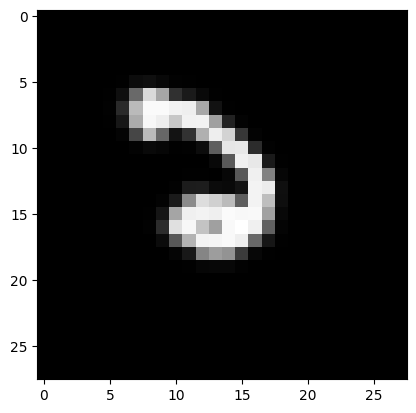

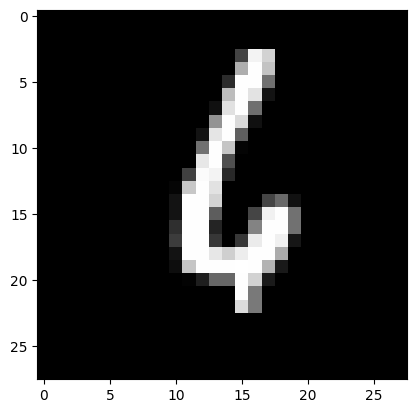

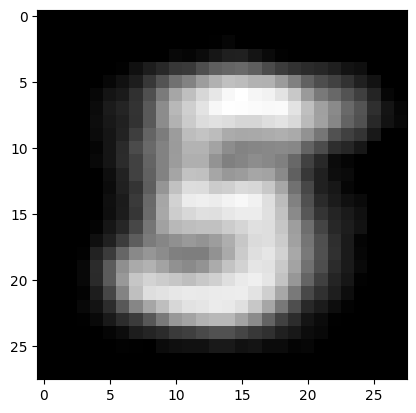

In [56]:
import matplotlib.pyplot as plt

testData = DataLoader(dataset=AlteredMNIST(train_test=True, train=False), batch_size=1, shuffle=True, num_workers=2, drop_last=True, pin_memory=True)
for x, y, label in testData:
    x = x.to('cuda')
    y = y.to('cuda')
    out = encoder.forward_ae(x)
    xhat = decoder.forward_ae(out)
    print(xhat.shape)
    plt.imshow(x.cpu().detach().numpy().reshape(28, 28), cmap='gray')
    plt.show()
    plt.imshow(y.cpu().detach().numpy().reshape(28, 28), cmap='gray')
    plt.show()
    plt.imshow(xhat.cpu().detach().numpy().reshape(28, 28), cmap='gray')
    plt.show()
    break

In [105]:
a = torch.randn(1,  224, 224)
a.squeeze().shape

torch.Size([224, 224])

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
1
24.60483896966553


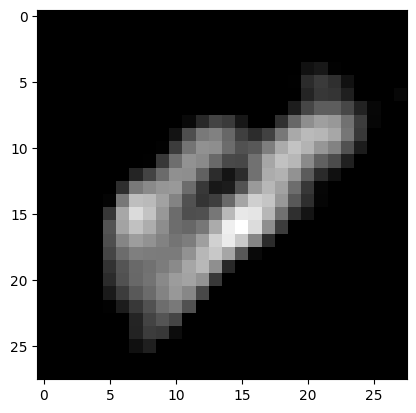

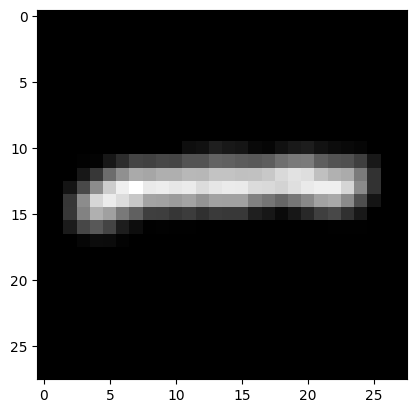

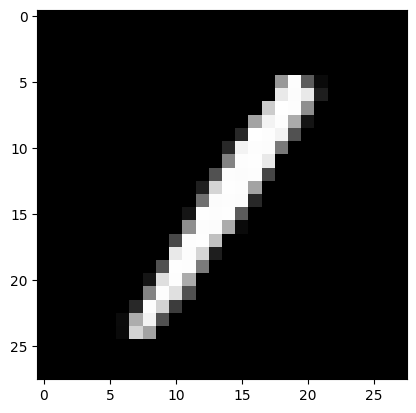

In [6]:
import os
import torch
import random
import argparse
from EncDec import *
from EncDec._2020211A3 import *
from torch.utils.data import DataLoader


dataset = AlteredMNIST(train_test=True, train=False)

AE_Pipeline = AE_TRAINED(gpu=False)

for noise_img, clean_img, label in dataset:
    print(noise_img.shape)
    print(clean_img.shape)
    print(label)
    ssim = AE_Pipeline.from_path(noise_img, clean_img, type='SSIM')
    print(ssim)
    noise_img = noise_img.unsqueeze(0)
    z = AE_Pipeline.encoder.forward_ae(noise_img)
    x_hat = AE_Pipeline.decoder.forward_ae(z)
    plt.imshow(x_hat.cpu().squeeze().detach().numpy(), cmap='gray')
    plt.show()
    plt.imshow(noise_img.cpu().squeeze().detach().numpy(), cmap='gray')
    plt.show()
    plt.imshow(clean_img.cpu().squeeze().detach().numpy(), cmap='gray')
    plt.show()
    break

In [2]:
x = torch.randn(28, 28, 3)
y = torch.randn(28, 28)
# make to shape (1, 3, 28, 28)
x = x.unsqueeze(0).permute(0, 3, 1, 2)
y.unsqueeze(0).unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [3]:
import os
import torch
import random
import argparse
from EncDec import *
from EncDec._2020211A3 import *
from torch.utils.data import DataLoader


dataset = AlteredMNIST(train_test=True, train=False)

AE_Pipeline = AE_TRAINED(gpu=False)
noise_img = './Data/aug/aug_2327_0.png'
clean_img = './Data/clean/clean_4123_0.png'

ssim = AE_Pipeline.from_path(noise_img, clean_img, metric_type='SSIM')
print(ssim)

46.79449775010067


In [7]:
img = dataset.transform2(dataset.loader(noise_img))
img.shape

torch.Size([1, 28, 28])

In [4]:
type(noise_img) == str

True